<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/12_club_APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 Phone pe (com.phonepe.app)

2 Google pay (com.google.android.apps.nbu.paisa.user)

3 PayTM (net.one97.paytm)

4 Mobikwik (com.mobikwik_new)

5 PhonPe business(com.phonepe.app.business)

6 BharatPe (com.bharatpe.app)
 

In [3]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.twelve.club',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=100000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [4]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e566965b-b81a-47d9-8019-44e3aa887751,FF Aditya,https://play-lh.googleusercontent.com/a-/ACB-R...,Been user since 4½ months.. The concept of app...,2,35,1.2.2,2023-04-07 04:53:17,We understand the disappointment this may have...,2023-04-07 05:10:03,1.2.2
1,3789d71d-5aa1-4832-ba6e-1f3c1a825b8d,Siddhartha Shekhar Pandey,https://play-lh.googleusercontent.com/a/AGNmyx...,Not able to start off with investing. When I c...,2,633,1.2.0,2022-12-09 09:57:22,It is equally unfortunate for us to see you ha...,2022-12-09 10:10:13,1.2.0
2,f12de950-0589-4e15-81b8-0305179d8910,Prajwal Padwal,https://play-lh.googleusercontent.com/a-/ACB-R...,Not able to start off with investing. When cli...,1,720,1.2.0,2022-12-23 14:45:41,This is certainly not the kind of experience w...,2022-12-23 15:02:38,1.2.0
3,4761b4bf-4846-481b-afa5-269f61df6049,Byomakesh Patra,https://play-lh.googleusercontent.com/a-/ACB-R...,With each update the app is removing the trans...,2,3,1.2.2,2023-04-18 20:18:23,It is equally unfortunate for us to see you ha...,2023-04-19 00:32:50,1.2.2
4,7f86add3-8590-4967-9698-781411ef6b87,Deepak Rawat,https://play-lh.googleusercontent.com/a-/ACB-R...,"They are making app less transparent, now they...",3,23,1.2.2,2023-04-02 17:55:52,It is equally unfortunate for us to see you ha...,2023-04-02 17:59:27,1.2.2


In [5]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9632 entries, 0 to 9631
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              9632 non-null   object        
 1   userName              9632 non-null   object        
 2   userImage             9632 non-null   object        
 3   content               9632 non-null   object        
 4   score                 9632 non-null   int64         
 5   thumbsUpCount         9632 non-null   int64         
 6   reviewCreatedVersion  8396 non-null   object        
 7   at                    9632 non-null   datetime64[ns]
 8   replyContent          9189 non-null   object        
 9   repliedAt             9189 non-null   datetime64[ns]
 10  appVersion            8396 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 827.9+ KB


In [6]:
#df_reviews.to_csv('12club_review.csv')

In [7]:
# Count number of review scores
df_reviews['score'].value_counts()

5    4076
1    3542
4     930
3     572
2     512
Name: score, dtype: int64

<Axes: ylabel='score'>

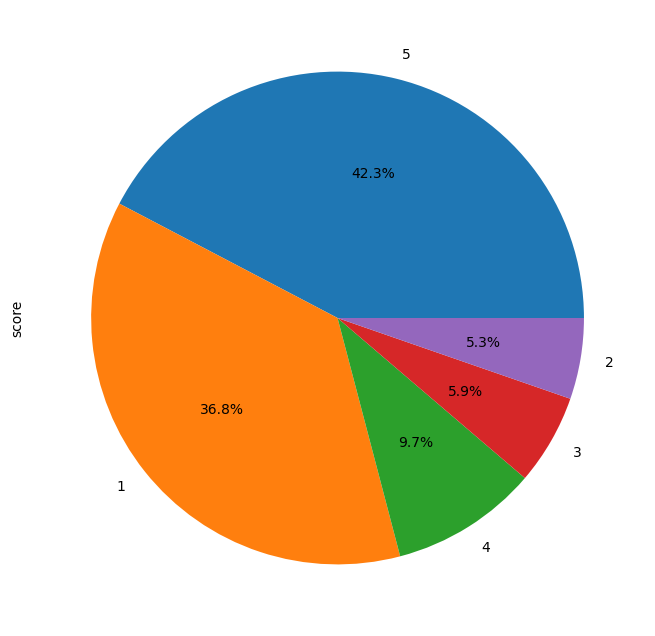

In [8]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [9]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [10]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,Been user since 4½ months.. The concept of app...,2
1,Not able to start off with investing. When I c...,2
2,Not able to start off with investing. When cli...,1
3,With each update the app is removing the trans...,2
4,"They are making app less transparent, now they...",3


Install azure text analytics API

In [11]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.4 MB/s eta 0:00:00


In [12]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [13]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [14]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Streaming output truncated to the last 5000 lines.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good
Review Content Sentiment: positive
Review Content Score: 5
Review Con

In [15]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    4545
negative    3421
neutral     1037
mixed        629
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

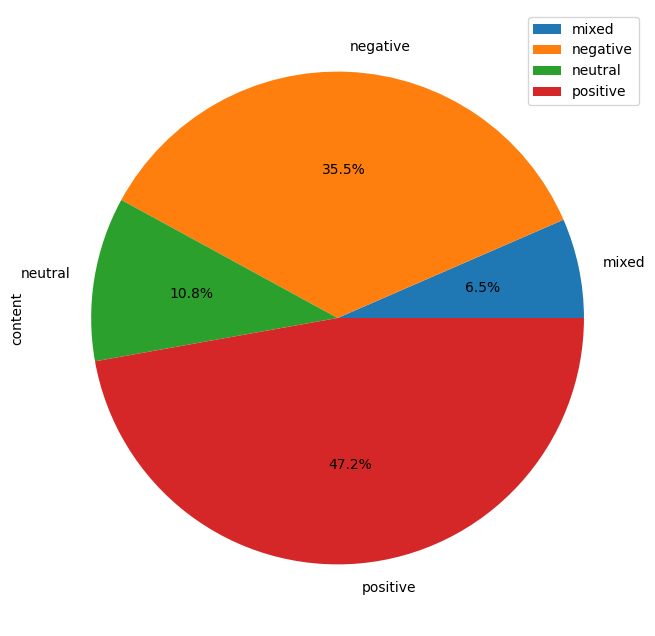

In [16]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [17]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 263
           2                  60
           3                  69
           4                  94
           5                 143
negative   1                2632
           2                 294
           3                 230
           4                 134
           5                 131
neutral    1                 437
           2                  99
           3                 111
           4                 129
           5                 261
positive   1                 210
           2                  59
           3                 162
           4                 573
           5                3541
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

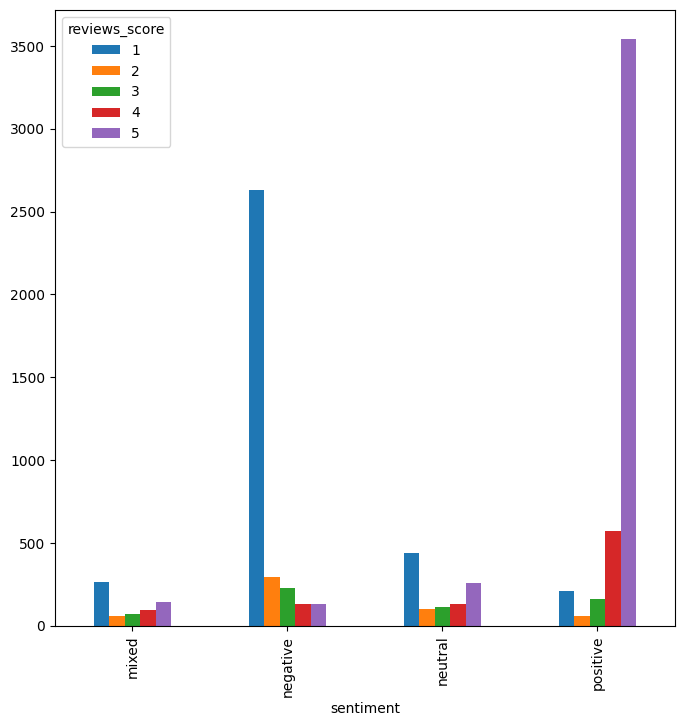

In [18]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [19]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9632 entries, 0 to 9631
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        9632 non-null   object
 1   sentiment      9632 non-null   object
 2   reviews_score  9632 non-null   object
dtypes: object(3)
memory usage: 225.9+ KB


In [20]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [21]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [22]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [23]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9632 entries, 0 to 9631
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        9632 non-null   object
 1   sentiment      9632 non-null   int64 
 2   reviews_score  9632 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 225.9+ KB


In [24]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                 263
           2                  60
           3                  69
           4                  94
           5                 143
1          1                2632
           2                 294
           3                 230
           4                 134
           5                 131
2          1                 210
           2                  59
           3                 162
           4                 573
           5                3541
3          1                 437
           2                  99
           3                 111
           4                 129
           5                 261
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

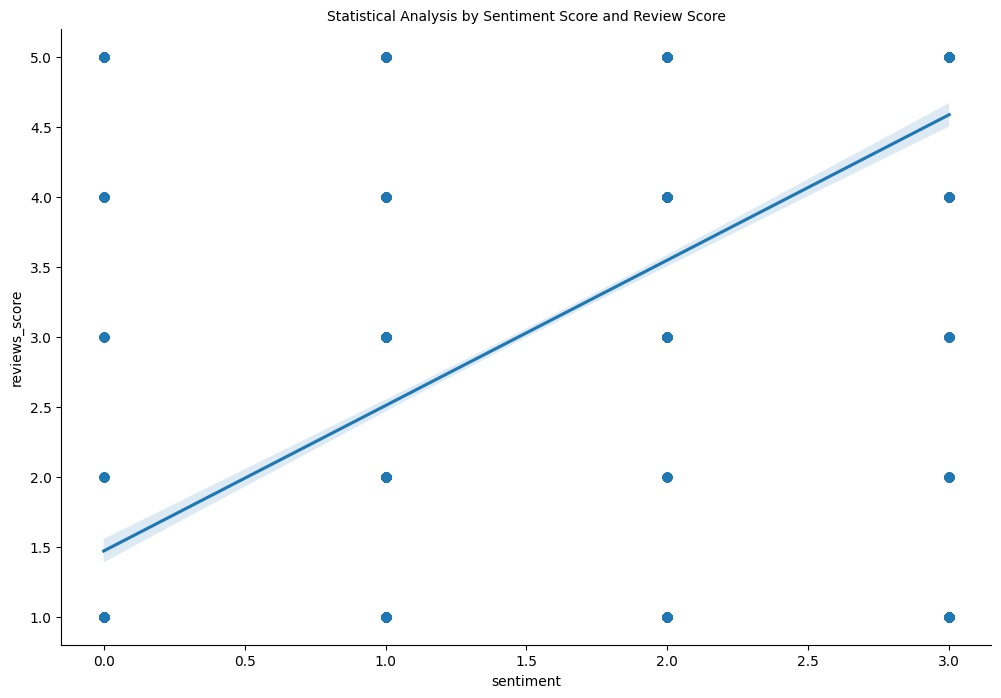

In [25]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.